In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('brain_stroke.csv')

In [3]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [5]:
data.shape

(4981, 11)

In [6]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [10]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [11]:
data.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [12]:
data_cat = data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                 'smoking_status', 'stroke']]

In [13]:
for i in data_cat.columns:
    print(data_cat[i].unique())

['Male' 'Female']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


In [14]:
for i in data_cat.columns:
    print(data_cat[i].value_counts())#no of values in data

Female    2907
Male      2074
Name: gender, dtype: int64
0    4502
1     479
Name: hypertension, dtype: int64
0    4706
1     275
Name: heart_disease, dtype: int64
Yes    3280
No     1701
Name: ever_married, dtype: int64
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64
0    4733
1     248
Name: stroke, dtype: int64


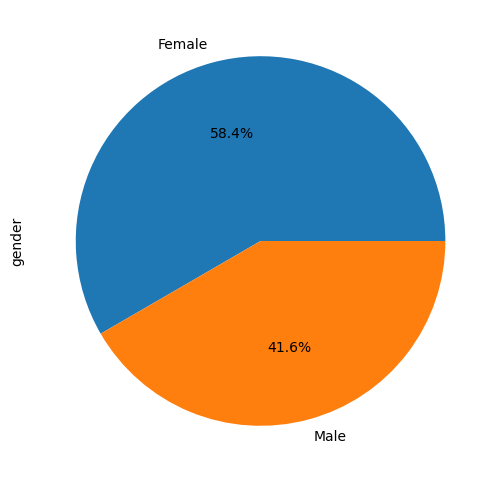

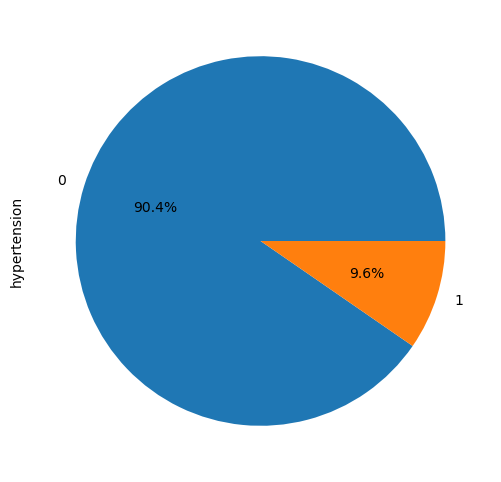

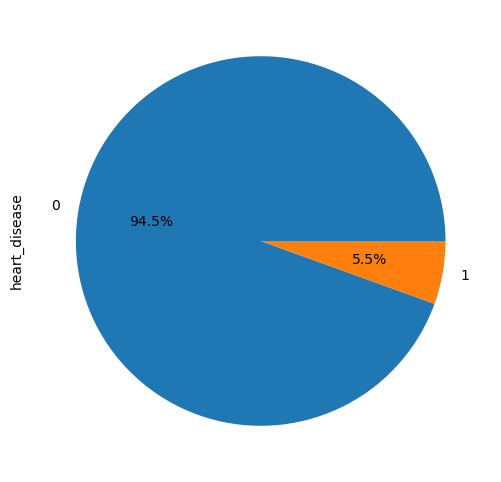

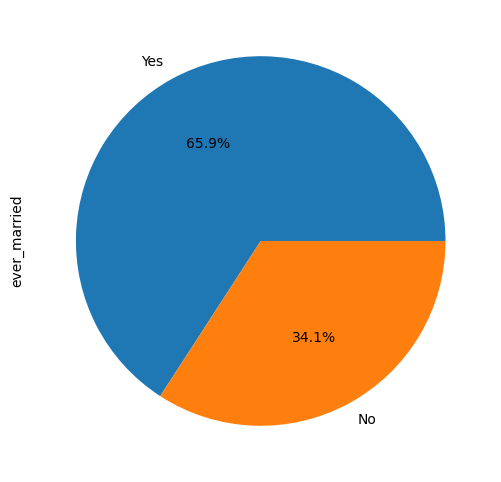

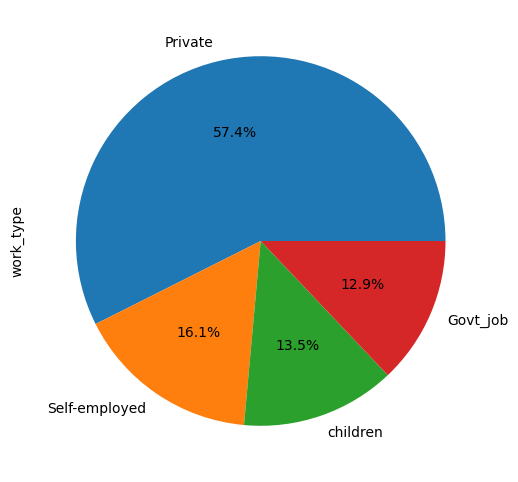

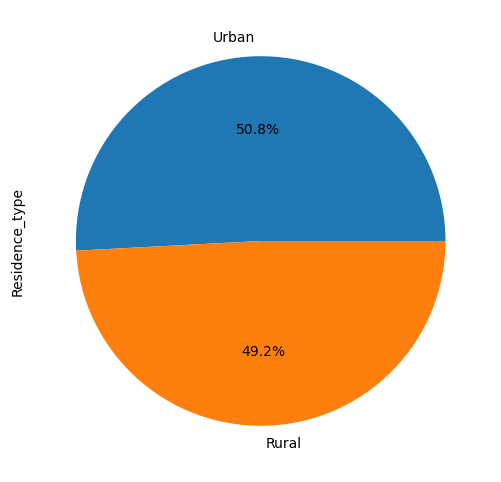

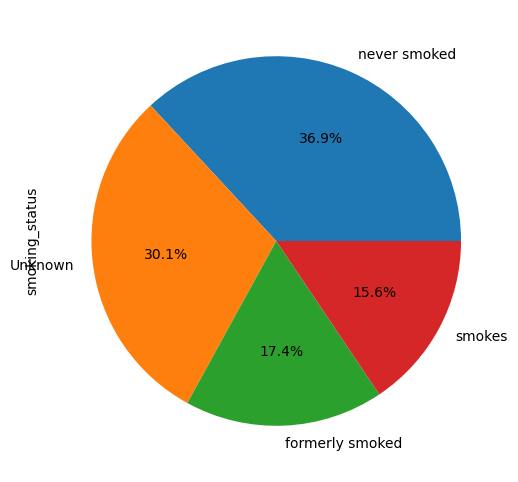

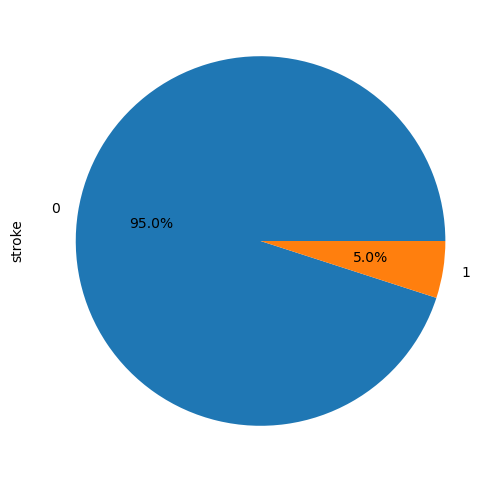

In [15]:
for i in data_cat.columns:
    plt.figure(figsize = (15,6))
    data_cat[i].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
    plt.xticks(rotation = 90)
    plt.show()

In [16]:
data_num = data[['age', 'avg_glucose_level', 'bmi']]
data_num

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,80.0,105.92,32.5
2,49.0,171.23,34.4
3,79.0,174.12,24.0
4,81.0,186.21,29.0
...,...,...,...
4976,41.0,70.15,29.8
4977,40.0,191.15,31.1
4978,45.0,95.02,31.8
4979,40.0,83.94,30.0


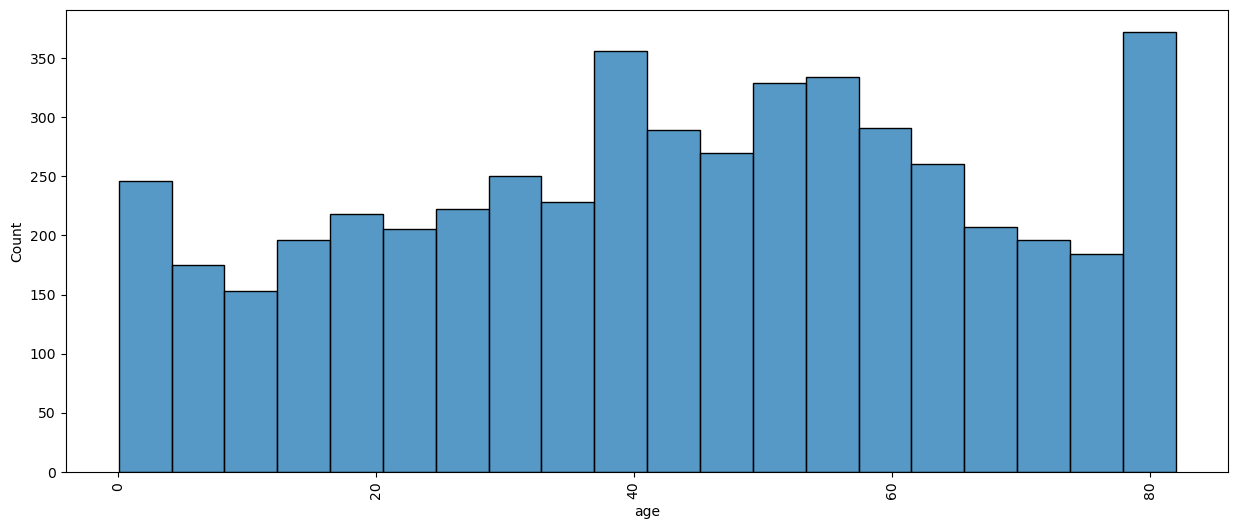

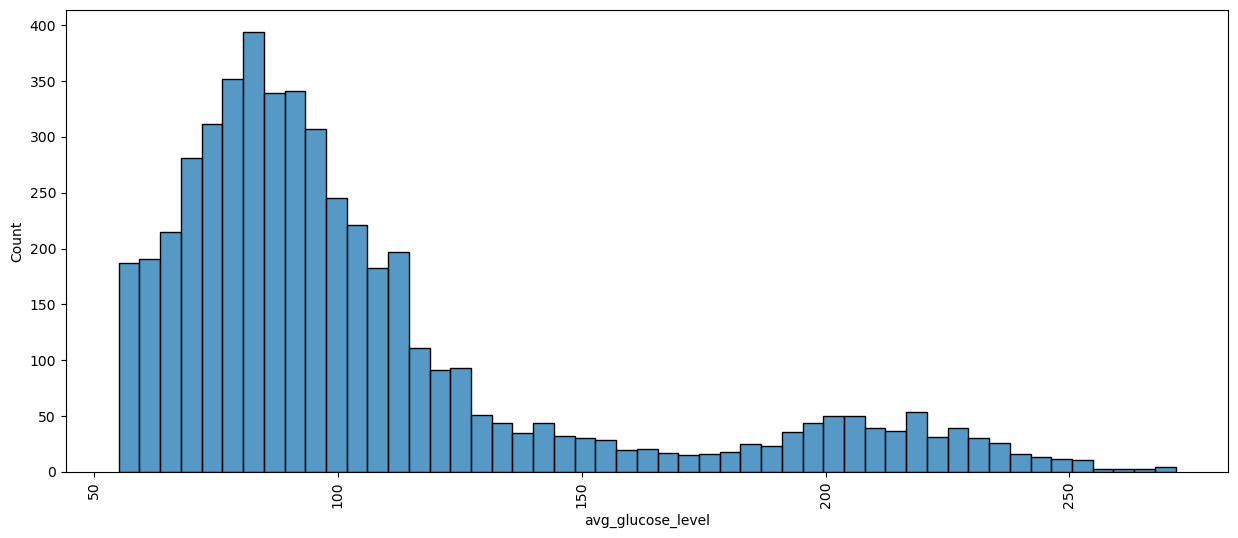

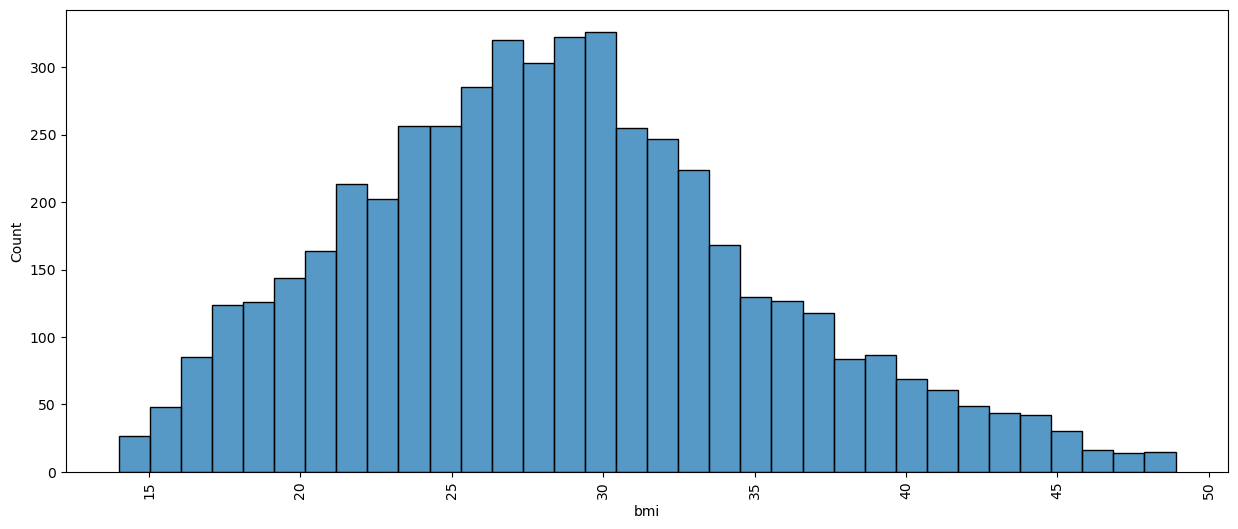

In [17]:
for i in data_num.columns:
    plt.figure(figsize = (15,6))
    sns.histplot(data_num[i], palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [18]:
data['ever_married'] = [ 0 if i !='Yes' else 1 for i in data['ever_married'] ]
data['gender'] = [0 if i != 'Female' else 1 for i in data['gender']]

In [19]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [20]:
#data = pd.get_dummies(data, columns=['work_type', 'Residence_type','smoking_status'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['work_type'] = le.fit_transform(data_cat['work_type'].astype(str))
data['Residence_type'] = le.fit_transform(data_cat['Residence_type'].astype(str)) # convert NaN to 'nan' string
data['smoking_status'] = le.fit_transform(data_cat['smoking_status'].astype(str))
#data['certaindays_hw'] = le.fit_transform(df['certaindays_hw'])
#data['age']=le.fit_transform(df['age'].astype(str))
#data['gender']=le.fit_transform(df['gender'].astype(str))

In [21]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,1,1,228.69,36.6,1,1
1,0,80.0,0,1,1,1,0,105.92,32.5,2,1
2,1,49.0,0,0,1,1,1,171.23,34.4,3,1
3,1,79.0,1,0,1,2,0,174.12,24.0,2,1
4,0,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,0,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,0,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,1,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,0,40.0,0,0,1,1,0,83.94,30.0,3,0


In [22]:
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split

In [23]:
X = data.drop(['stroke'], axis = 1)
y = data['stroke']

In [24]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((3337, 10), (1644, 10))

In [25]:
classifier_log= LogisticRegression(random_state=50)  
classifier_log.fit(X_train, y_train)  

LogisticRegression(random_state=50)

In [26]:
print('Training-set accuracy score:', classifier_log.score(X_train, y_train))

Training-set accuracy score: 0.9511537308960144


In [27]:
print('Test-set accuracy score:', classifier_log.score(X_test, y_test))

Test-set accuracy score: 0.9482968369829684


In [28]:
classifier_dt = DecisionTreeClassifier(criterion='gini', random_state=0,max_depth= 5)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [29]:
print('Training-set accuracy score:', classifier_dt.score(X_train, y_train))

Training-set accuracy score: 0.9526520827090201


In [30]:
print('Testing-set accuracy score:', classifier_dt.score(X_test, y_test))

Testing-set accuracy score: 0.9495133819951338


In [31]:
classifier_rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier_rf.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [32]:
print('Training-set accuracy score:', classifier_rf.score(X_train, y_train))

Training-set accuracy score: 0.991309559484567


In [33]:
print('Testing-set accuracy score:', classifier_rf.score(X_test, y_test))

Testing-set accuracy score: 0.9464720194647201


In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
score_rf=cross_val_score(RandomForestClassifier(n_estimators=50),X,y,cv=5)
print(score_rf)
print("Avg:",np.average(score_rf))

[0.94784353 0.94678715 0.94779116 0.94879518 0.94779116]
Avg: 0.9478016378452627


In [36]:
first=[0,
       80.0,
       0,
       1,
       1,
       1,
       0,
       105.92,
       32.5,
       2]

In [37]:
first= np.array([first])
first
 

array([[  0.  ,  80.  ,   0.  ,   1.  ,   1.  ,   1.  ,   0.  , 105.92,
         32.5 ,   2.  ]])

In [38]:
classifier_rf.predict(first)

array([1], dtype=int64)

In [47]:
pred = classifier_rf.predict(first)
 
if pred[0] == 1:
  print('patient has stroke')
else:
  print('Patient has no stroke')

patient has stroke
